# Potato Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.67944956 0.6363123  0.66768485]
  [0.67832327 0.635186   0.66655856]
  [0.67719704 0.6340598  0.66543233]
  ...
  [0.77101606 0.72395724 0.7318004 ]
  [0.7716122  0.7245534  0.73239654]
  [0.77937406 0.73231524 0.7401584 ]]

 [[0.6847822  0.6416449  0.6730175 ]
  [0.6842191  0.64108187 0.6724544 ]
  [0.683656   0.6405187  0.6718913 ]
  ...
  [0.7704529  0.7233941  0.73123723]
  [0.77273846 0.72567964 0.7335228 ]
  [0.78050035 0.73344153 0.74128467]]

 [[0.67672026 0.633583   0.66495556]
  [0.6789728  0.6358355  0.6672081 ]
  [0.68122524 0.638088   0.66946054]
  ...
  [0.76988983 0.722831   0.73067415]
  [0.7738647  0.72680587 0.734649  ]
  [0.7816265  0.7345677  0.74241084]]

 ...

 [[0.5192092  0.4603857  0.47999355]
  [0.54637575 0.48755217 0.50716007]
  [0.5684929  0.50966936 0.5292772 ]
  ...
  [0.56191206 0.4874023  0.49524543]
  [0.5641646  0.48965478 0.49749792]
  [0.56641704 0.49190724 0.49975038]]

 [[0.5231511  0.46432754 0.4839354 ]
  [0.5503176  0.49149403 0.5111019 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7632867  0.69662    0.669169  ]
  [0.7579431  0.69127643 0.66382545]
  [0.7525995  0.6859328  0.65848184]
  ...
  [0.7239048  0.64547336 0.6493949 ]
  [0.7445871  0.66615576 0.6700773 ]
  [0.73418766 0.6557563  0.65967786]]

 [[0.7853358  0.71866906 0.6912181 ]
  [0.7826639  0.7159972  0.68854624]
  [0.7799921  0.71332544 0.68587446]
  ...
  [0.72924834 0.650817   0.65473855]
  [0.74592304 0.6674916  0.6714132 ]
  [0.7281761  0.64974475 0.6536663 ]]

 [[0.76193136 0.6952647  0.66781366]
  [0.7712827  0.70461595 0.677165  ]
  [0.78063387 0.7139672  0.6865162 ]
  ...
  [0.73459196 0.6561606  0.66008216]
  [0.7472589  0.66882753 0.6727491 ]
  [0.72216463 0.64373326 0.64765483]]

 ...

 [[0.5281324  0.40656376 0.38695592]
  [0.54990005 0.42833138 0.40872353]
  [0.55541044 0.43384176 0.41423392]
  ...
  [0.60764945 0.49164847 0.48298225]
  [0.6043097  0.48964462 0.48031044]
  [0.6009699  0.48764077 0.47763866]]

 [[0.53280807 0.41123942 0.39163157]
  [0.550568   0.42899933 0.4093915 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4637 - loss: 0.9641 - val_accuracy: 0.5000 - val_loss: 0.8766
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 38s 845ms/step - accuracy: 0.3438 - loss: 0.9992

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.3438 - loss: 0.9992 - val_accuracy: 0.5000 - val_loss: 0.9092
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5775 - loss: 0.8324 - val_accuracy: 0.7292 - val_loss: 0.6252
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7812 - loss: 0.6479 - val_accuracy: 0.8021 - val_loss: 0.5459
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8008 - loss: 0.4657 - val_accuracy: 0.8750 - val_loss: 0.2964
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8125 - loss: 0.5487 - val_accuracy: 0.8750 - val_loss: 0.2965
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8674 - loss: 0.3327 - val_accuracy: 0.8333 - val_loss: 0.3998
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9688 - loss: 0.1953 - val_accuracy: 0.8438 - val_loss: 0.3601
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8934 - loss: 0.2378 - val_accuracy: 0.8958 - val_loss: 0.25

In [16]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9377 - loss: 0.1372


In [17]:
scores

[0.13223771750926971, 0.9396751523017883]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9097163081169128,
 0.9992499351501465,
 0.7293060421943665,
 0.647946834564209,
 0.373260498046875]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.5,
 0.5,
 0.7291666865348816,
 0.8020833134651184,
 0.875,
 0.875,
 0.8333333134651184,
 0.84375,
 0.8958333134651184,
 0.8854166865348816,
 0.890625,
 0.9010416865348816,
 0.90625,
 0.9114583134651184,
 0.9635416865348816,
 0.9166666865348816,
 0.9375,
 0.9479166865348816,
 0.9427083134651184,
 0.9427083134651184]

In [26]:
acc

[0.510176420211792,
 0.34375,
 0.6540027260780334,
 0.78125,
 0.8459972739219666,
 0.8125,
 0.8670284748077393,
 0.96875,
 0.8907734155654907,
 0.875,
 0.9097693562507629,
 0.90625,
 0.9409769177436829,
 0.84375,
 0.9389416575431824,
 0.875,
 0.9341926574707031,
 0.96875,
 0.9409769177436829,
 0.9375]

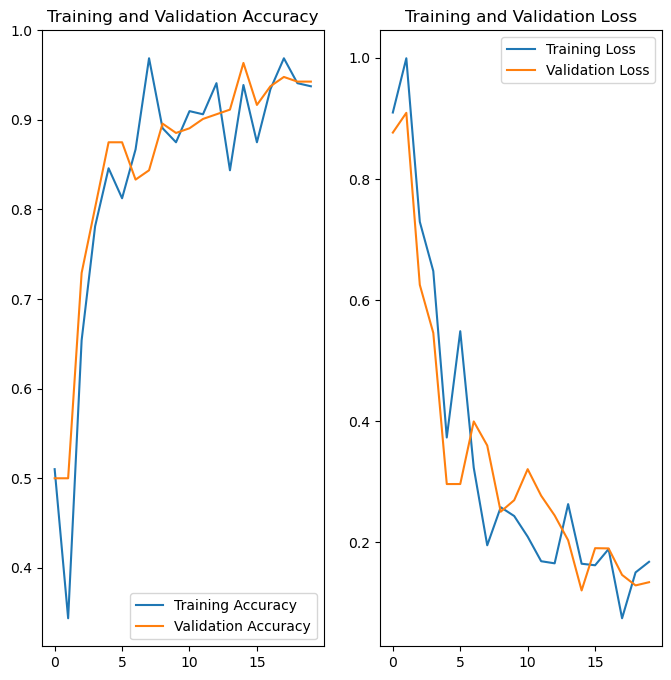

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
predicted label: Potato___Late_blight


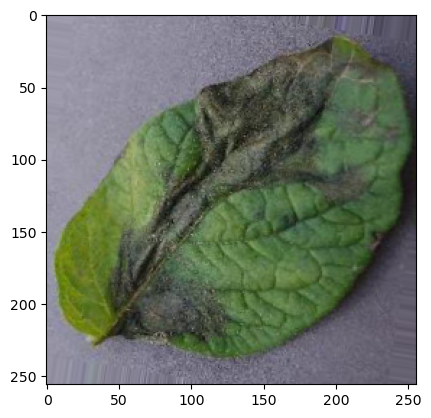

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


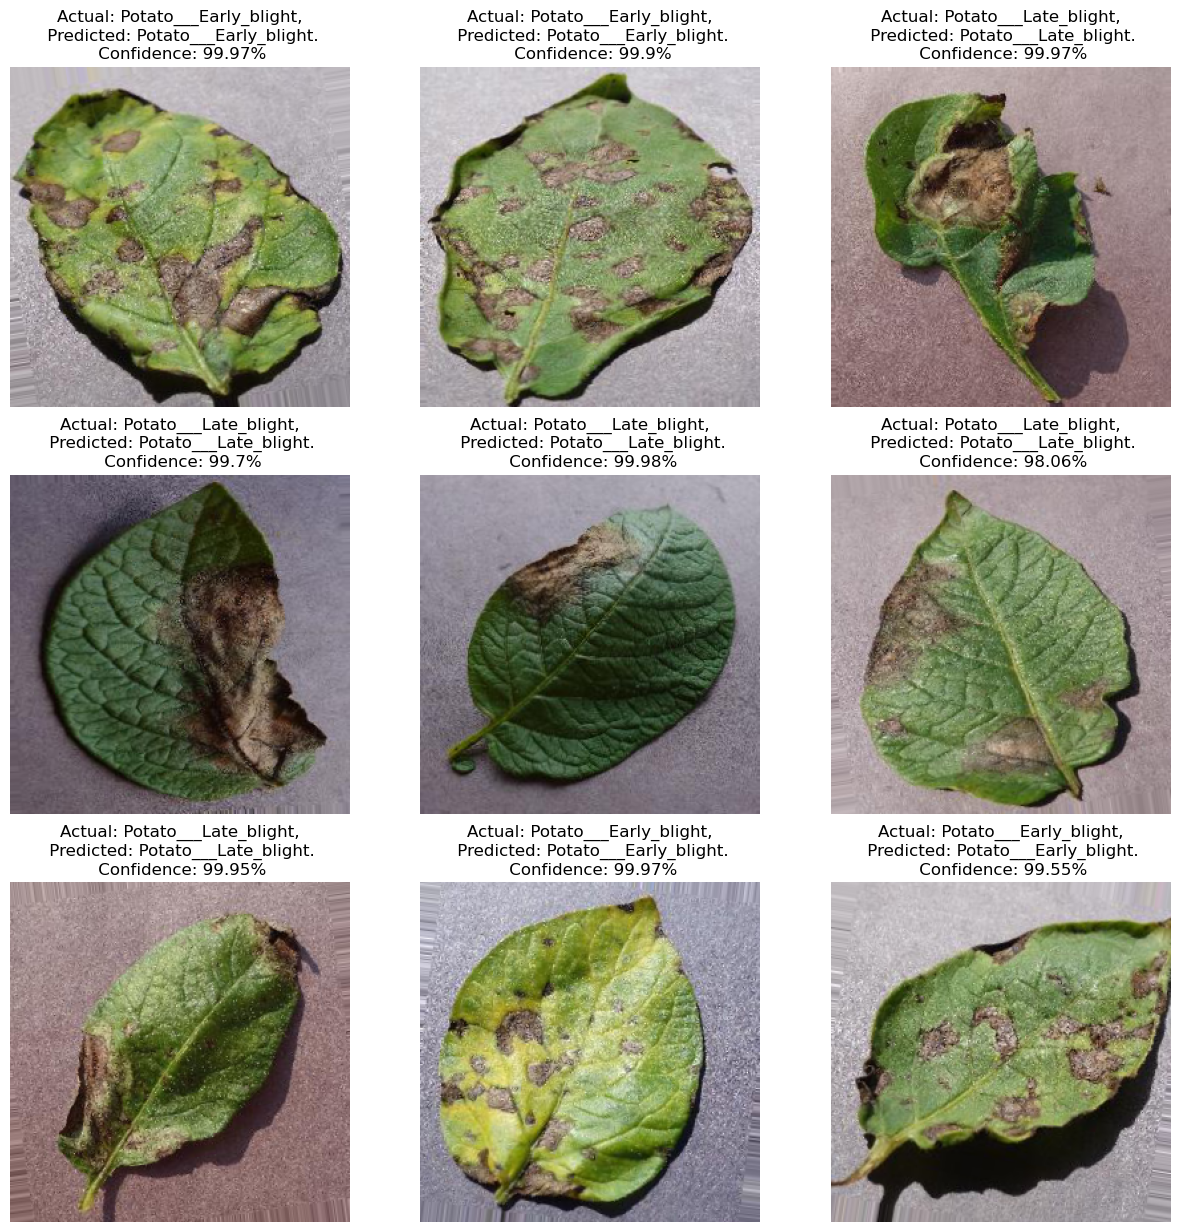

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [32]:
model.save("../potatoes.h5")

In [33]:
print(tf.__version__)


2.18.0
